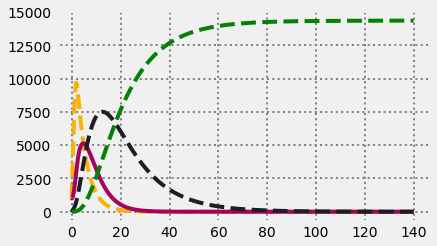

In [18]:
from numpy import array as vector
import math

# Explicit Euler method
def euler_method(f,t0,x0,t1,h):
    t = t0; x = x0
    a = [[t,x]]
    for k in range(0,1+int((t1-t0)/h)):
        t = t0 + k*h
        x = x + h*f(t,x)
        a.append([t,x])
    return a

def SEIR_model(beta,betaf,tau,gamma,delta,k,alpha,N):
    def f(t,x):
        S,Sf,E,I,Q,R = x
        return vector([
            -beta*S*I/N-betaf*(1-math.exp(-1*tau*Q))*S,
            betaf*(1-math.exp(-1*tau*Q))*S-delta*beta*Sf/N,
            beta*S*I/N + delta*beta*Sf/N - k*E,
            k*E - alpha*I,
            alpha*I-gamma*Q,
            gamma*Q
        ])
    return f

def SEIR_simulation(beta,betaf,tau,gamma,delta,k,alpha,E0,I0,days,step,N):
    x0 = vector([N-E0-I0,0.0,E0,I0,0.0,0.0])
    return euler_method(SEIR_model(beta,betaf,tau,gamma,delta,k,alpha,N),0,x0,days,step)

def diagram(simulation):
    import matplotlib.pyplot as plot
    %matplotlib inline
    plot.style.use('fivethirtyeight')
    figure,axes = plot.subplots()
    figure.subplots_adjust(bottom = 0.15)
    axes.grid(linestyle = ':', linewidth = 2.0, color = "#808080")
    t,x = zip(*simulation())
    S,Sf,E,I,Q,R = zip(*x)
    #axes.plot(t,S, color = "#0000cc")
    #axes.plot(t,Sf, color = "#9ed6c0")
    axes.plot(t,E, color = "#ffb000", linestyle = '--')
    axes.plot(t,I, color = "#a00060")
    axes.plot(t,Q, color = "#1d1e23", linestyle = '--')
    axes.plot(t,R, color = "#008000", linestyle = '--')
    plot.show()

def simulation1():
    N = 51839408 # 한국 전체 인구 수
    R0 = 2.4; gamma = 1/14.0
    return SEIR_simulation(
        beta = 7.0591, betaf = 4.8106, tau = 1/1000, gamma = gamma, delta = 0.02, k = 1/4.1, alpha = 1/4,
        E0 = 1000.0, I0 = 1000.0, days = 140,step=0.1,N = N)

diagram(simulation1) #검은색 : Q(격리군), 노란색 : E(접촉군), 자홍색 : I(감염군), 녹색 : R(회복군)

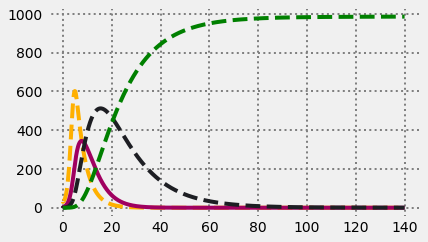

In [20]:
def simulation2():
    N = 1163 # 한국 전체 인구 수
    R0 = 2.4; gamma = 1/14.0
    return SEIR_simulation(
        beta = 7.0591, betaf = 4.8106, tau = 1/1000, gamma = gamma, delta = 0.02, k = 1/4.1, alpha = 1/4,
        E0 = 30.0, I0 = 1.0, days = 140,step=0.1,N = N)

diagram(simulation2)